# Techniques of Pandas packages

The goal of this notebook is to practice using [pandas](https://pypi.org/project/pandas/) methods. 

## Collaborator: Zijie Li, Xiang Li

## Part 1 Pandas techniques

This part will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. 

In [1]:
import pandas as pd
import csv

f = pd.read_csv("/Users/jonathanzha/Desktop/cs506/homework-1-JonathanZha47/titanic/train.csv")
df = pd.DataFrame(f)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value 

In [2]:
from re import I
import pandas as pd

def num_nans(df):
    return df.shape[0] - df.dropna().shape[0]

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values 

In [3]:
import pandas as pd

print(len(df))
i = 200/891
print(i)

def drop_na(df):
    limit = len(df)*i
    return df.dropna(thresh=limit, axis=1)

df = drop_na(df)
df.columns
df.head()



891
0.2244668911335578


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


d) Write a function that replaces `male` with 0 and `female` with 1 

In [4]:
import pandas as pd

def to_numerical(df):
    return df.replace(['male','female'],['0','1'])

df = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [5]:
import pandas as pd

def extract_names(df):
    splitted_Last = df['Name'].str.split(",")
    splitted = df['Name'].str.split(n=3)
    splitted_title = splitted_Last.str[1].str.split(".")
    
    return [splitted.str[2],splitted.str[3],splitted_Last.str[0],splitted_title.str[0]]

df['First Name'] = extract_names(df)[0]
df['Middle Name'] = extract_names(df)[1]
df['Last Name'] = extract_names(df)[2]
df['Title'] = extract_names(df)[3]
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,John,Bradley (Florence Briggs Thayer),Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Jacques,Heath (Lily May Peel),Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,William,Henry,Allen,Mr


f) Write a function that replaces all missing ages with the average age 

In [6]:
import pandas as pd

def replace_with_mean(df):
    return df['Age'].fillna(df['Age'].mean())

df['Age'] = replace_with_mean(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,John,Bradley (Florence Briggs Thayer),Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Jacques,Heath (Lily May Peel),Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,William,Henry,Allen,Mr



g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. 

<AxesSubplot:>

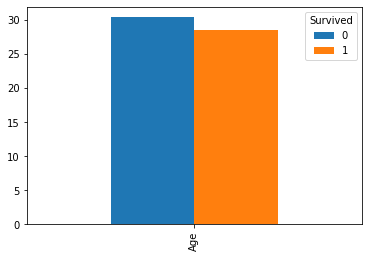

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df_bar = pd.pivot_table(df, values='Age', columns='Survived', aggfunc={'Age':'mean'})
df_bar.plot.bar()

#people who survived have an average lower age compared to people who did not survive.



#people who survived have an average lower age compared to people who did not survive.

h) Plot a bar chart of the proportion that survived for male and female. 

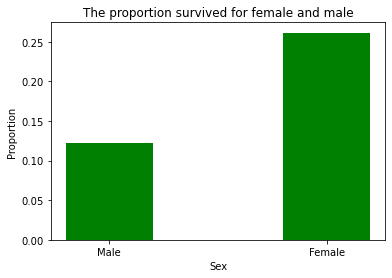

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

grouped_h = df.groupby('Sex')

female = grouped_h.get_group("1")

male =  grouped_h.get_group("0")

Male_proportion = male['Survived'].value_counts()[1] / df['Survived'].count() 

Female_proportion = female['Survived'].value_counts()[1]/df['Survived'].count()

Sex = ['Male','Female']
proportion = [Male_proportion,Female_proportion]

plt.bar(Sex, proportion,color='green',width=0.4)
plt.xlabel("Sex")
plt.ylabel("Proportion")
plt.title("The proportion survived for female and male")
plt.show()



Female have a larger proportion to survive than male.

i) Plot a bar chart of the proportion that survived for each title. 

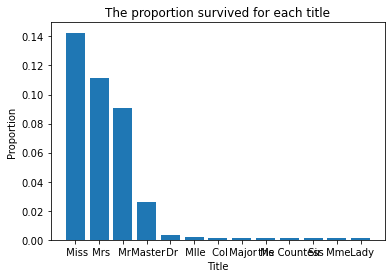

' Method that use for loop\ndef count_survival_for_title(df):\n    grouped_i = df[\'Title\'].drop_duplicates()\n    Title_survival_count =[]\n    for i in grouped_i:\n        Title_survival_count.append(((df[\'Survived\']==1)&(df[\'Title\'] == i)).sum())\n    return Title_survival_count\n\nprint(count_survival_for_title(df))\ndef calculate_proportion(list,df):\n    result = []\n    for i in list:\n        result.append(i / df[\'Survived\'].count())\n    return result\n\nTitle = df[\'Title\'].drop_duplicates()\n\nProportion = calculate_proportion(count_survival_for_title(df),df)\n\nplt.bar(Title, Proportion,color=\'Yellow\',width=0.4)\nplt.xlabel("Title")\nplt.ylabel("Proportion")\nplt.title("The proportion survived for each title")\nplt.show()\n'

In [9]:
from tokenize import group
import pandas as pd
import matplotlib.pyplot as plt


def extract_names(df):
    splitted_Last = df['Name'].str.split(",")
    splitted = df['Name'].str.split(n=3)
    splitted_title = splitted_Last.str[1].str.split(".")
    
    return [splitted.str[2],splitted.str[3],splitted_Last.str[0],splitted_title.str[0]]

df['First Name'] = extract_names(df)[0]
df['Middle Name'] = extract_names(df)[1]
df['Last Name'] = extract_names(df)[2]
df['Title'] = extract_names(df)[3]

survived_for_title = list(df.loc[df['Survived']==1, 'Title'])

Count_survived_for_each_title = pd.value_counts(survived_for_title)

plt.bar(list(Count_survived_for_each_title.index),list(Count_survived_for_each_title.values/len(df['Survived'])))
plt.xlabel("Title")
plt.ylabel("Proportion")
plt.title("The proportion survived for each title")
plt.show()


""" Method that use for loop
def count_survival_for_title(df):
    grouped_i = df['Title'].drop_duplicates()
    Title_survival_count =[]
    for i in grouped_i:
        Title_survival_count.append(((df['Survived']==1)&(df['Title'] == i)).sum())
    return Title_survival_count

print(count_survival_for_title(df))
def calculate_proportion(list,df):
    result = []
    for i in list:
        result.append(i / df['Survived'].count())
    return result

Title = df['Title'].drop_duplicates()

Proportion = calculate_proportion(count_survival_for_title(df),df)

plt.bar(Title, Proportion,color='Yellow',width=0.4)
plt.xlabel("Title")
plt.ylabel("Proportion")
plt.title("The proportion survived for each title")
plt.show()
"""


People who have a title of Miss have the highest survival rate, followed by Mrs while people who have a title of Mr have the lowest survival rate.
Other Titles have insufficient data available to analyze the true survival rate.

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. 

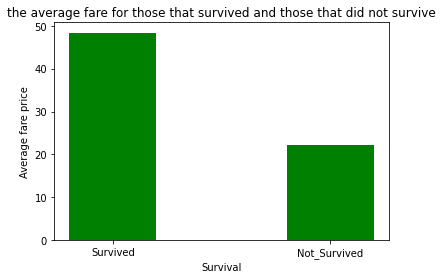

In [10]:
import pandas as pd


grouped_j = df.groupby('Survived')

survived_j = grouped_j.get_group(1)

not_survived_j = grouped_j.get_group(0)

Average_fare_survived = survived_j['Fare'].mean()

Average_fare_not_survived = not_survived_j['Fare'].mean()

Survival = ['Survived','Not_Survived']

Average_fare = [Average_fare_survived,Average_fare_not_survived]

plt.bar(Survival, Average_fare,color='green',width=0.4)
plt.xlabel("Survival")
plt.ylabel("Average fare price")
plt.title("the average fare for those that survived and those that did not survive")
plt.show()


People who survived have higher average fare price than people who did not survived.

k) Create a boxplot for the fare of those that survived and those that did not survive. 

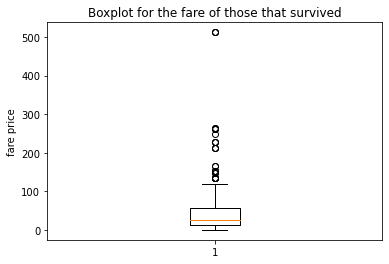

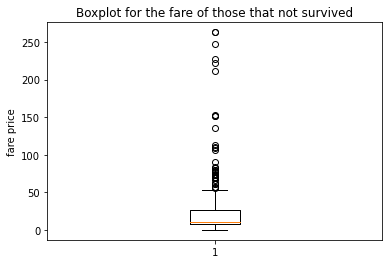

In [11]:
import pandas as pd


grouped_j = df.groupby('Survived')

survived_j = grouped_j.get_group(1)

not_survived_j = grouped_j.get_group(0)

fare_survived = survived_j['Fare']

fare_not_survived = not_survived_j['Fare']


plt.boxplot(fare_survived)
plt.ylabel("fare price")
plt.title("Boxplot for the fare of those that survived")
plt.show()
plt.boxplot(fare_not_survived)
plt.ylabel("fare price")
plt.title("Boxplot for the fare of those that not survived")
plt.show()



1.People who survived have higher average fare price than people who did not survived.
2.Though people who did not surived have more outlier in the fare price, the average fare price is still lower than those who survived.
3.The distributiion of people who survived and did not survived is similar.
4.The 

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation 

In [12]:
def fare_price_cal(df):
    return (df['Fare'].values - df['Fare'].mean())/df['Fare'].std()
df['Fare']= df['Fare'].replace(list(df['Fare']),fare_price_cal(df))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502163,NaN,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786404,C85,C,John,Bradley (Florence Briggs Thayer),Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488580,NaN,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420494,C123,S,Jacques,Heath (Lily May Peel),Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486064,NaN,S,William,Henry,Allen,Mr


l) Remove all non-numerical columns from the dataframe. 

In [13]:

df = df.select_dtypes(['number'])
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,-0.502163
1,2,1,1,38.0,1,0,0.786404
2,3,1,3,26.0,0,0,-0.488580
3,4,1,1,35.0,1,0,0.420494
4,5,0,3,35.0,0,0,-0.486064


m) Ignoring passenger ID, write a function that returns the names of the N most similar pairs of passengers using the euclidean distance? - (15 points)

In [14]:
import itertools

def euclidean_dist(x, y):
    res = 0
    for i in range(len(x)):
        res += (x[i] - y[i])**2
    return res**(1/2)

def N_most_similar_pairs(df, N):
    pairs = {}
    numerical_row_list = df[df.columns[1:]].values.tolist()
    for m in range(len(numerical_row_list)-1):
        for n in range(m+1,len(numerical_row_list)):
                res = euclidean_dist(numerical_row_list[m],numerical_row_list[n])
                pairs[(m,n)] = res
    sorted_pairs = dict(sorted(pairs.items(), key=lambda x: x[1], reverse=False))
    TopN_similar_pairs = dict(itertools.islice(sorted_pairs.items(),N))
    print(TopN_similar_pairs)
    f = pd.read_csv("/Users/jonathanzha/Desktop/cs506/homework-1-JonathanZha47/titanic/train.csv")
    Data = pd.DataFrame(f)
    name_list = []
    for i in TopN_similar_pairs:
        name_list.append((Data['Name'][i[0]],Data['Name'][i[1]]))
    return name_list

print("The 3 most similar passengers are: " + str(N_most_similar_pairs(df,3)))


{(4, 614): 0.0, (13, 610): 0.0, (21, 576): 0.0}
The 3 most similar passengers are: [('Allen, Mr. William Henry', 'Brocklebank, Mr. William Alfred'), ('Andersson, Mr. Anders Johan', 'Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)'), ('Beesley, Mr. Lawrence', 'Garside, Miss. Ethel')]


## Part 2 Python scrub

Another way to get data by using APIs. Here we will be using the google books API (https://developers.google.com/books/docs/overview)

a) Create a list with these topic strings: Python; Data Science; Data Analysis; Machine Learning; and Deep 
Learning. Use these topics, one at a time, to query the Google Books API by modifying the code below.

In [15]:
import requests
import json

"""
    Google Books Api
    See: https://developers.google.com/books/
"""

def get(topic=""):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}

    response = requests.get(BASEURL + "?q=" + topic, headers=headers)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))

    return response
List = ["Python","Data Science","Data Analysis","Machine Learning","Deep Learning"]
python = get(List[0])
data_science = get(List[1])
data_analytics = get(List[2])
machine_learning = get(List[3])
deep_learning = get(List[4])

b) For each returned JSON string: Convert the JSON string to a dict using `loads( )` then use this to convert it to a DataFrame: `pd.json_normalize( thedict['items'] )`. Then save them as `.csv`. 

In [16]:
import pandas as pd

py = pd.json_normalize(python['items'])
py.to_csv('python.csv', encoding='utf-8', index=False)

ds = pd.json_normalize(data_science['items'])
ds.to_csv('data_science.csv', encoding='utf-8', index=False)

da = pd.json_normalize(data_analytics['items'])
da.to_csv('data_analytics.csv',encoding='utf-8', index=False)

ml = pd.json_normalize(machine_learning['items'])
ml.to_csv('machine_learning.csv',encoding='utf-8', index=False)

dl = pd.json_normalize(deep_learning['items'])
dl.to_csv('deep_learning.csv',encoding='utf-8', index=False)


c) For each DataFrame, relabel `volumeInfo.title` as `Title` and `volumeInfo.authors` as `Authors`. 

In [17]:
py.rename(columns={'volumeInfo.title':'Title','volumeInfo.authors':'Authors'}, inplace=True)
ds.rename(columns={'volumeInfo.title':'Title','volumeInfo.authors':'Authors'}, inplace=True)
da.rename(columns={'volumeInfo.title':'Title','volumeInfo.authors':'Authors'}, inplace=True)
ml.rename(columns={'volumeInfo.title':'Title','volumeInfo.authors':'Authors'}, inplace=True)
dl.rename(columns={'volumeInfo.title':'Title','volumeInfo.authors':'Authors'}, inplace=True)

d) For each DataFrame create a new column called `Topic` with the name of the topic from the API query above. Then merge all DataFrames into one and save it to a new `.csv` file. 

In [18]:
py['Topic'] = 'Python'
ds['Topic'] = 'Data Science'
da['Topic'] = 'Data Analytics'
ml['Topic'] = 'Machine Learning'
dl['Topic'] = 'Deep Learning'

merged_csv = pd.concat([py,ds,da,ml,dl])
merged_csv.to_csv("Merged.csv",encoding='utf-8', index=False)

e) Write a function that returns all rows whose `Title` contains the word `Data` (case incensitive). 

In [19]:
def Contain_Data(merged_csv):

    return merged_csv[merged_csv['Title'].str.contains("Data")]

Contain_Data(merged_csv)


,kind,id,etag,selfLink,Title,Authors,volumeInfo.publisher,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,volumeInfo.subtitle,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,accessInfo.epub.acsTokenLink,accessInfo.pdf.acsTokenLink,Topic
0,books#volume,vfi3DQAAQBAJ,hT/t5ScqcaI,https://www.googleapis.com/books/v1/volumes/vf...,R for Data Science,"[Hadley Wickham, Garrett Grolemund]","""O'Reilly Media, Inc.""",2016-12-12,Learn how to use R to turn raw data into insig...,"[{'type': 'ISBN_13', 'identifier': '9781491910...",...,"Import, Tidy, Transform, Visualize, and Model ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Science
1,books#volume,vcVKAQAAQBAJ,ByRKB/DEYrs,https://www.googleapis.com/books/v1/volumes/vc...,Doing Data Science,"[Cathy O'Neil, Rachel Schutt]","""O'Reilly Media, Inc.""",2013-10-09,Now that people are aware that data can make t...,"[{'type': 'ISBN_13', 'identifier': '9781449363...",...,Straight Talk from the Frontline,46.99,USD,46.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",NaN,NaN,Data Science
2,books#volume,TFpVDwAAQBAJ,CEuPA320Rqc,https://www.googleapis.com/books/v1/volumes/TF...,Data Science,"[John D. Kelleher, Brendan Tierney]",MIT Press,2018-04-13,A concise introduction to the emerging field o...,"[{'type': 'ISBN_13', 'identifier': '9780262535...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Science
3,books#volume,6omNDQAAQBAJ,QpRJyTqYqEQ,https://www.googleapis.com/books/v1/volumes/6o...,Python Data Science Handbook,[Jake VanderPlas],"""O'Reilly Media, Inc.""",2016-11-21,"For many researchers, Python is a first-class ...","[{'type': 'ISBN_13', 'identifier': '9781491912...",...,Essential Tools for Working with Data,59.99,USD,59.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",NaN,NaN,Data Science
4,books#volume,xb29DwAAQBAJ,sTaGvZQTzMk,https://www.googleapis.com/books/v1/volumes/xb...,Introduction to Data Science,[Rafael A. Irizarry],CRC Press,2019-11-20,Introduction to Data Science: Data Analysis an...,"[{'type': 'ISBN_13', 'identifier': '9781000708...",...,Data Analysis and Prediction Algorithms with R,NaN,NaN,NaN,NaN,NaN,NaN,http://books.google.com/books/download/Introdu...,http://books.google.com/books/download/Introdu...,Data Science
5,books#volume,2kLADwAAQBAJ,ev+GG7VF0pw,https://www.googleapis.com/books/v1/volumes/2k...,Data Science Programming All-In-One For Dummies,"[John Paul Mueller, Luca Massaron]",John Wiley & Sons,2020-01-09,"Your logical, linear guide to the fundamentals...","[{'type': 'ISBN_13', 'identifier': '9781119626...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Science
6,books#volume,JYodCAAAQBAJ,RqiYxmNv4Cg,https://www.googleapis.com/books/v1/volumes/JY...,Data Science from Scratch,[Joel Grus],"""O'Reilly Media, Inc.""",2015-04-14,"Data science libraries, frameworks, modules, a...","[{'type': 'ISBN_13', 'identifier': '9781491904...",...,First Principles with Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Science
7,books#volume,xDszEAAAQBAJ,KX6iSYUNgc8,https://www.googleapis.com/books/v1/volumes/xD...,Build a Career in Data Science,"[Emily Robinson, Jacqueline Nolis]",Simon and Schuster,2020-03-06,Summary You are going to need more than techni...,"[{'type': 'ISBN_13', 'identifier': '9781638350...",...,NaN,28.99,USD,28.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",http://books.google.com/books/download/Build_a...,NaN,Data Science
8,books#volume,b4YxCwAAQBAJ,1SUQ7oMcE8Q,https://www.googleapis.com/books/v1/volumes/b4...,Getting Started with Data Science,[Murtaza Haider],IBM Press,2015-12-14,Master Data Analytics Hands-On by Solving Fasc...,"[{'type': 'ISBN_13', 'identifier': '9780133991...",...,Making Sense of Data with Analytics,31.99,USD,18.49,USD,https://play.google.co

f) Write a function that returns all rows whose `Authors` first or last name starts with the letter `E`

In [20]:
from re import X


py['Topic'] = 'Python'
ds['Topic'] = 'Data Science'
da['Topic'] = 'Data Analytics'
ml['Topic'] = 'Machine Learning'
dl['Topic'] = 'Deep Learning'

merged_csv = pd.concat([py,ds,da,ml,dl])
merged_csv.to_csv("Merged.csv",encoding='utf-8', index=False)

def iterate(lst, start, end):
    if start < 0 or end >= len(lst) or start > end:
        return lst
    if lst[start][0] == 'E':
        return True
    iterate(lst, start + 1, end)

def extract_E_Authors(merged_csv):
    x = merged_csv['Authors']
    fun_A = lambda x : ' '.join(x).split(',')
    fun_C = lambda z : ' '.join(z).split(' ')
    fun_B = lambda y: True if (iterate(y,0,len(y)-1) == True) else False
    merged_csv['Check'] = merged_csv['Authors'].apply(fun_A)
    merged_csv['Check'] = merged_csv['Authors'].apply(fun_C)
    merged_csv['Check'] = merged_csv['Authors'].apply(fun_B)
    return merged_csv

merged_csv = extract_E_Authors(merged_csv)
rlst_df = merged_csv[merged_csv['Check'] == True]
print(rlst_df)



"""
def get_keys_from_value(dictionary, val):
    return [k for k, v in dictionary.items() if v == val]

def extract_author_name_to_dict(merged_csv):
    author_name = {}
    f = 0
    for i in merged_csv['Authors']:
        f += 1
        if len(i)>= 2:
            for m in range(len(i)):
                new_n = i[m].split(" ")
                author_name[f] = new_n
        else:
                new_n = i[0].split(" ")
                author_name[f] = new_n
    print(author_name)
    returned_row_number = []
    for value in author_name.values():
        for i in value:
            if i[0] == 'E':
                returned_row_number.append(get_keys_from_value(author_name,value))
    return returned_row_number
"""



        

            




           kind            id         etag  \
7  books#volume  xDszEAAAQBAJ  KX6iSYUNgc8   
3  books#volume  NP5bBAAAQBAJ  q4e2Kx9Caeg   
5  books#volume  LrT4DwAAQBAJ  ecbQKuKVHMU   

                                            selfLink  \
7  https://www.googleapis.com/books/v1/volumes/xD...   
3  https://www.googleapis.com/books/v1/volumes/NP...   
5  https://www.googleapis.com/books/v1/volumes/Lr...   

                              Title                             Authors  \
7    Build a Career in Data Science  [Emily Robinson, Jacqueline Nolis]   
3  Introduction to Machine Learning                    [Ethem Alpaydin]   
5     Introduction to Deep Learning                   [Eugene Charniak]   

  volumeInfo.publisher volumeInfo.publishedDate  \
7   Simon and Schuster               2020-03-06   
3            MIT Press               2014-08-29   
5            MIT Press               2019-01-29   

                              volumeInfo.description  \
7  Summary You are going to 

'\ndef get_keys_from_value(dictionary, val):\n    return [k for k, v in dictionary.items() if v == val]\n\ndef extract_author_name_to_dict(merged_csv):\n    author_name = {}\n    f = 0\n    for i in merged_csv[\'Authors\']:\n        f += 1\n        if len(i)>= 2:\n            for m in range(len(i)):\n                new_n = i[m].split(" ")\n                author_name[f] = new_n\n        else:\n                new_n = i[0].split(" ")\n                author_name[f] = new_n\n    print(author_name)\n    returned_row_number = []\n    for value in author_name.values():\n        for i in value:\n            if i[0] == \'E\':\n                returned_row_number.append(get_keys_from_value(author_name,value))\n    return returned_row_number\n'